In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
ovarian = pd.read_csv('allMI.csv')

ovarian = ovarian.drop(['Unnamed: 0'], axis = 1)
ovarian = ovarian.dropna(axis=1, how='any')
print(ovarian.shape)
ovarian.head()

(100, 428)


,20.745237,20.830337,26.446717,26.542791,26.735461,27.220184,34.244758,34.35407,34.463556,34.573217,...,9306.4274,9308.2281,9310.0289,9311.83,9313.6312,9315.4325,9317.2341,9319.0358,9320.8377,Outcome
0,0.0,0.0,0.0,0.0,0.000742,0.0,0.000355,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.000553,0.0,0.000347,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000638,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.000662,0.0,0.000000,0.000331,0.0,0.0,...,0.000375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.000586,0.0,0.000000,0.000251,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
from sklearn.model_selection import train_test_split

#following tutorials from sklearn

X_train, X_test, y_train, y_test = train_test_split(ovarian.loc[:, ovarian.columns != 'Outcome'], ovarian['Outcome'], stratify=ovarian['Outcome'], test_size = 0.3, random_state=66)

X_train.head()

print(X_train)

    20.745237  20.830337  26.446717  26.542791  26.735461  27.220184  \
74   0.000000   0.000000   0.000000   0.000000   0.000628   0.000000   
32   0.000000   0.000000   0.000000   0.000000   0.000994   0.000000   
5    0.000000   0.000000   0.000000   0.000000   0.000567   0.000000   
54   0.000000   0.000000   0.000000   0.000000   0.000696   0.000000   
53   0.000277   0.000000   0.000000   0.000000   0.000887   0.000000   
9    0.000000   0.000000   0.000000   0.000000   0.001063   0.000000   
83   0.000000   0.000000   0.000000   0.000000   0.000693   0.000000   
99   0.000000   0.000000   0.000000   0.000000   0.000677   0.000000   
37   0.000000   0.000000   0.000000   0.000000   0.000828   0.000000   
93   0.000000   0.000000   0.000735   0.000000   0.000000   0.000000   
76   0.000000   0.000000   0.000574   0.000000   0.000000   0.000000   
4    0.000000   0.000000   0.000000   0.000000   0.000586   0.000000   
6    0.000000   0.000000   0.000000   0.000000   0.000551   0.00

In [96]:
print (X_train.dtypes.index[426])
for f in range(0,426):
    print("%d. mass %s" % (f + 1, X_train.dtypes.index[f]))

9320.8377
1. mass 20.745237
2. mass 20.830337
3. mass 26.446717
4. mass 26.542791
5. mass 26.735461
6. mass 27.220184
7. mass 34.244758
8. mass 34.35407
9. mass 34.463556
10. mass 34.573217
11. mass 43.417086
12. mass 43.540159
13. mass 43.663406
14. mass 43.786828
15. mass 44.158137
16. mass 45.155959
17. mass 49.652507
18. mass 49.784115
19. mass 49.915898
20. mass 59.573524
21. mass 62.785057
22. mass 64.872655
23. mass 65.023076
24. mass 65.17367
25. mass 65.324439
26. mass 65.475383
27. mass 72.925499
28. mass 73.084977
29. mass 73.24463
30. mass 77.292556
31. mass 78.610885
32. mass 79.606947
33. mass 79.773568
34. mass 79.940362
35. mass 80.10733
36. mass 80.274473
37. mass 80.44179
38. mass 80.609281
39. mass 80.776946
40. mass 88.326664
41. mass 88.853698
42. mass 89.029724
43. mass 89.205924
44. mass 89.382299
45. mass 89.558848
46. mass 92.586829
47. mass 92.766514
48. mass 93.306612
49. mass 93.486993
50. mass 93.667548
51. mass 93.848277
52. mass 94.029181
53. mass 94.2102

In [68]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.600


In [11]:
for max_depth in range(1, 5):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print(max_depth)
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

1
Accuracy on training set: 0.743
Accuracy on test set: 0.567
2
Accuracy on training set: 0.871
Accuracy on test set: 0.567
3
Accuracy on training set: 0.929
Accuracy on test set: 0.567
4
Accuracy on training set: 0.957
Accuracy on test set: 0.533


In [79]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

[ 0.          0.          0.          0.          0.2808552   0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.06290774  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.19592116  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.09350649  0.       

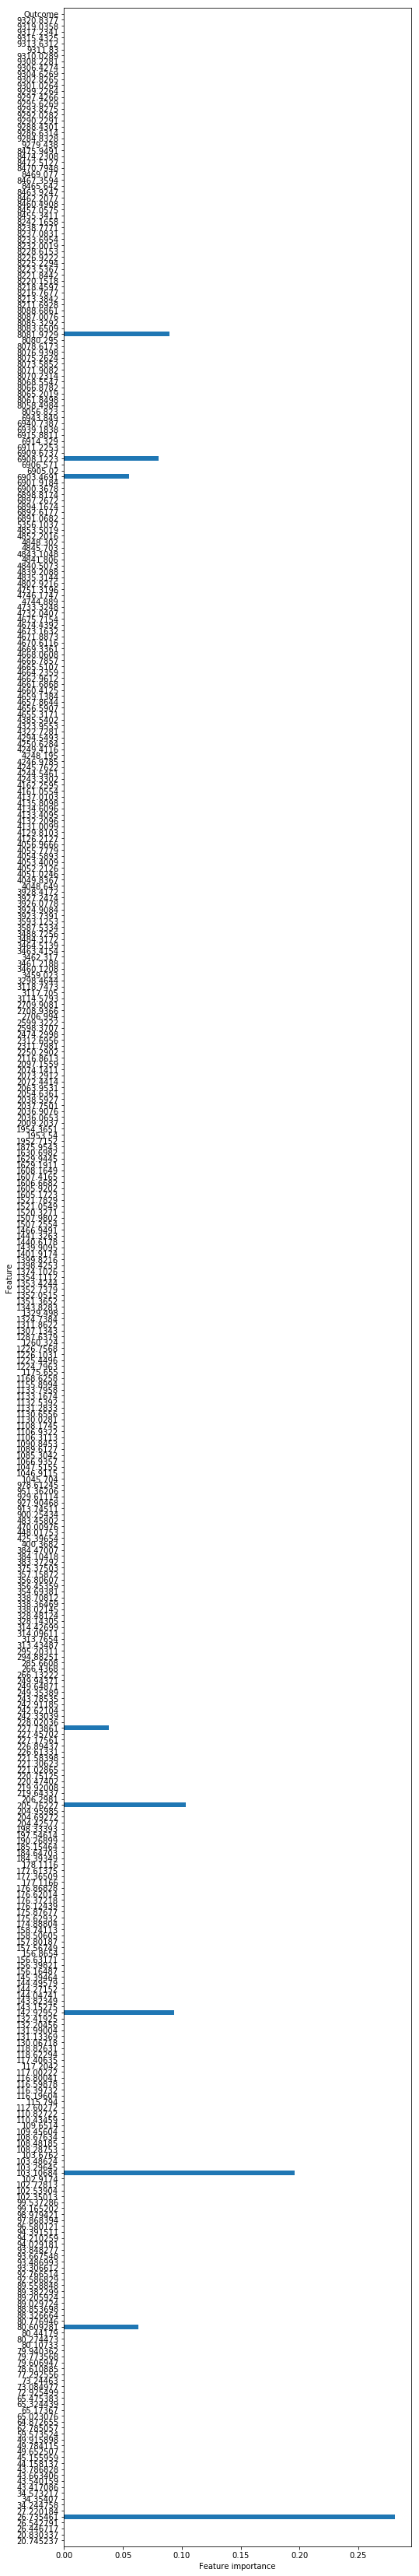

In [76]:
#print("Feature importances:\n{}".format(tree.feature_importances_))

ovarian_features = [x for i,x in enumerate(ovarian.columns) if i!=8]
def plot_feature_importances_ovarian(model):
    plt.figure(figsize=(8, 60))
    n_features = 427
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ovarian_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    
plot_feature_importances_ovarian(tree)
plt.savefig('feature_importance')

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.800


In [139]:
for max_depth in range(1, 4):
    rf1 = RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=0)
    rf1.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.900
Accuracy on test set: 0.700
Accuracy on training set: 0.943
Accuracy on test set: 0.767
Accuracy on training set: 0.971
Accuracy on test set: 0.833


In [140]:
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 4 (0.076645)
2. feature 27 (0.048781)
3. feature 12 (0.042199)
4. feature 88 (0.042017)
5. feature 320 (0.039938)
6. feature 11 (0.035541)
7. feature 63 (0.032089)
8. feature 28 (0.029701)
9. feature 7 (0.028223)
10. feature 229 (0.025282)
11. feature 284 (0.024401)
12. feature 17 (0.020768)
13. feature 200 (0.020074)
14. feature 124 (0.019157)
15. feature 101 (0.018808)
16. feature 37 (0.018136)
17. feature 36 (0.016006)
18. feature 43 (0.014682)
19. feature 22 (0.013236)
20. feature 21 (0.013166)
21. feature 89 (0.012706)
22. feature 291 (0.012500)
23. feature 230 (0.012280)
24. feature 282 (0.011961)
25. feature 6 (0.011952)
26. feature 302 (0.011893)
27. feature 212 (0.011056)
28. feature 321 (0.010237)
29. feature 112 (0.009852)
30. feature 401 (0.008997)
31. feature 62 (0.008722)
32. feature 123 (0.008420)
33. feature 26 (0.007899)
34. feature 109 (0.007892)
35. feature 78 (0.007771)
36. feature 373 (0.007710)
37. feature 420 (0.007501)
38. feature 77 (0.007395)
39. fe

Feature importances:
[  8.68432479e-04   0.00000000e+00   2.12580738e-03   0.00000000e+00
   7.66446307e-02   0.00000000e+00   1.19515536e-02   2.82230291e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.55412490e-02
   4.21993449e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.58974359e-03   2.07679861e-02   1.13636364e-03   0.00000000e+00
   0.00000000e+00   1.31657414e-02   1.32363017e-02   1.09675847e-05
   0.00000000e+00   0.00000000e+00   7.89933980e-03   4.87810689e-02
   2.97009933e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.60061378e-02   1.81363199e-02   0.00000000e+00   0.00000000e+00
   1.45132661e-03   1.01988444e-03   0.00000000e+00   1.46815163e-02
   2.56576714e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   3.55225828e-03   2.94293298e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000

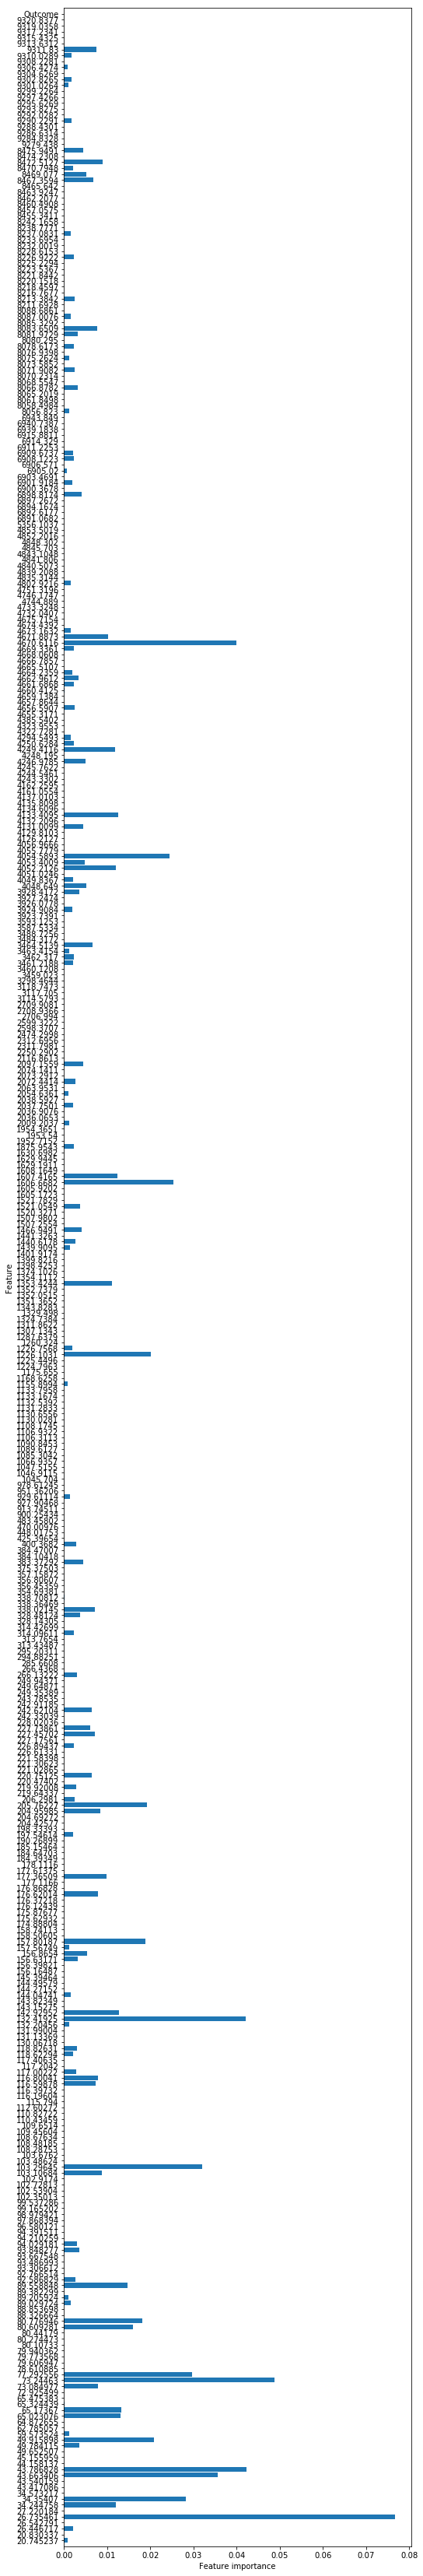

In [141]:
plot_feature_importances_ovarian(rf1)
print("Feature importances:\n{}".format(rf1.feature_importances_))

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.800


In [12]:
for max_depth in range(1, 5):
    gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
    gb1.fit(X_train, y_train)

    print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.833
Accuracy on training set: 1.000
Accuracy on test set: 0.833
Accuracy on training set: 1.000
Accuracy on test set: 0.833
Accuracy on training set: 1.000
Accuracy on test set: 0.833


In [22]:
gb2 = GradientBoostingClassifier(random_state=0, min_samples_leaf=1)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

gb2 = GradientBoostingClassifier(random_state=0, min_samples_leaf=4)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

gb2 = GradientBoostingClassifier(random_state=0, min_samples_split=4
                                )
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.800
Accuracy on training set: 1.000
Accuracy on test set: 0.833
Accuracy on training set: 1.000
Accuracy on test set: 0.833


In [98]:
importances = gb2.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 4 (0.079676)
2. feature 348 (0.072885)
3. feature 291 (0.071694)
4. feature 320 (0.063550)
5. feature 27 (0.049309)
6. feature 12 (0.049176)
7. feature 63 (0.045502)
8. feature 28 (0.044794)
9. feature 417 (0.043655)
10. feature 62 (0.042399)
11. feature 6 (0.040965)
12. feature 36 (0.033599)
13. feature 284 (0.030399)
14. feature 98 (0.026089)
15. feature 88 (0.024954)
16. feature 92 (0.017684)
17. feature 124 (0.017454)
18. feature 17 (0.017057)
19. feature 89 (0.016258)
20. feature 419 (0.015626)
21. feature 49 (0.014927)
22. feature 127 (0.014013)
23. feature 365 (0.013393)
24. feature 2 (0.011732)
25. feature 321 (0.011626)
26. feature 319 (0.011151)
27. feature 48 (0.010684)
28. feature 282 (0.009297)
29. feature 339 (0.007416)
30. feature 79 (0.006717)
31. feature 200 (0.006681)
32. feature 349 (0.006448)
33. feature 285 (0.005606)
34. feature 351 (0.005181)
35. feature 268 (0.004895)
36. feature 157 (0.004680)
37. feature 230 (0.004343)
38. feature 43 (0.003829)
39. 

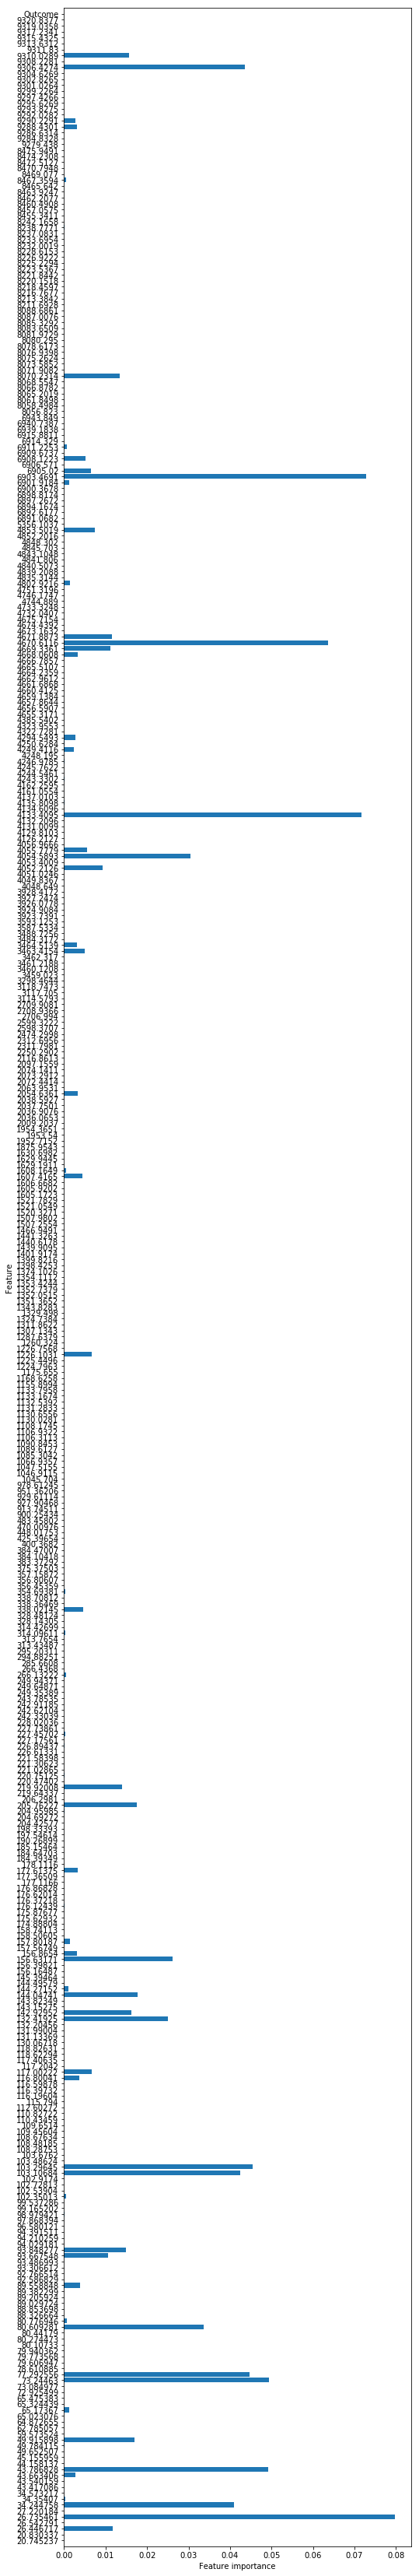

In [137]:
plot_feature_importances_ovarian(gb2)


In [99]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.60


In [102]:
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

svc2 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = svc2.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

Accuracy on training set: 0.96
Accuracy on test set: 0.93


In [132]:
print(y_score)

[[-0.95857108]
 [ 1.2270454 ]
 [-1.20791041]
 [-0.83133608]
 [-0.25041305]
 [ 0.08901866]
 [-0.74854099]
 [-0.77170396]
 [ 0.3049822 ]
 [ 0.0914563 ]
 [ 1.21540459]
 [-0.07835176]
 [ 0.95937806]
 [-0.85881785]
 [ 0.6374088 ]
 [-1.26720052]
 [-1.02462177]
 [-0.28705903]
 [-0.00663897]
 [-0.666653  ]
 [ 0.04128186]
 [ 1.01667451]
 [ 1.79829985]
 [ 0.36748121]
 [ 0.20969976]
 [ 0.53484917]
 [ 0.10510326]
 [-0.22974935]
 [ 0.26938718]
 [-0.68932439]]


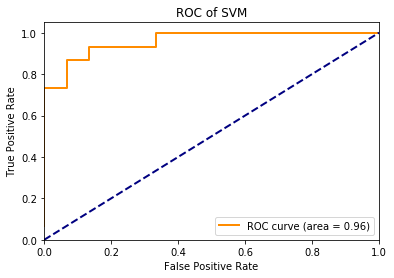

In [138]:
y_test.head()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend(loc="lower right")
plt.show()

In [62]:
svc = SVC(C=1000, gamma = 0.001)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.867


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
C_range = np.logspace(-2, 10, 13)

gamma_range = np.logspace(-9, 3, 13)

#gamma_range = np.append(gamma_range, np.logspace(-4, 3, 8))
param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, n_jobs)
grid = GridSearchCV(SVC(), param_grid=param_grid,  n_jobs=1)
grid_result = grid.fit(X_train_scaled, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

0.785714 (0.085289) with: {'C': 0.01, 'gamma': 1.0000000000000001e-09}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 1e-08}
0.871429 (0.030785) with: {'C': 0.01, 'gamma': 9.9999999999999995e-08}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 9.9999999999999995e-07}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 1.0000000000000001e-05}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 0.0001}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 0.001}
0.857143 (0.049268) with: {'C': 0.01, 'gamma': 0.01}
0.857143 (0.051941) with: {'C': 0.01, 'gamma': 0.10000000000000001}
0.500000 (0.061546) with: {'C': 0.01, 'gamma': 1.0}
0.642857 (0.073876) with: {'C': 0.01, 'gamma': 10.0}
0.500000 (0.000000) with: {'C': 0.01, 'gamma': 100.0}
0.500000 (0.000000) with: {'C': 0.01, 'gamma': 1000.0}
0.785714 (0.085289) with: {'C': 0.10000000000000001, 'gamma': 1.0000000000000001e-09}
0.857143 (0.049268) with: {'C': 0.10000000000000001, 'gamma': 1e-08}
0.871429 (0.030785) with: {'C': 0.10000000000000001, 'gamma': 9

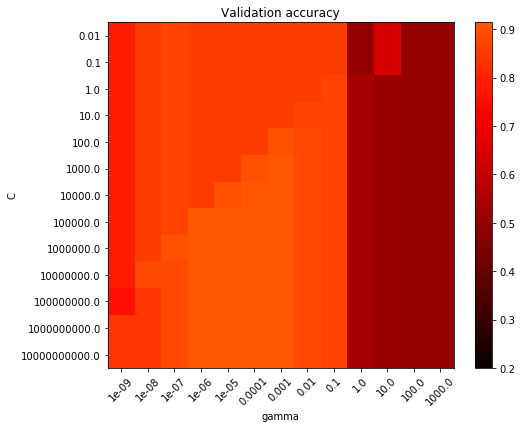

In [66]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train_scaled, y_train)
        classifiers.append((C, gamma, clf))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.50
Accuracy on test set: 0.50


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.900


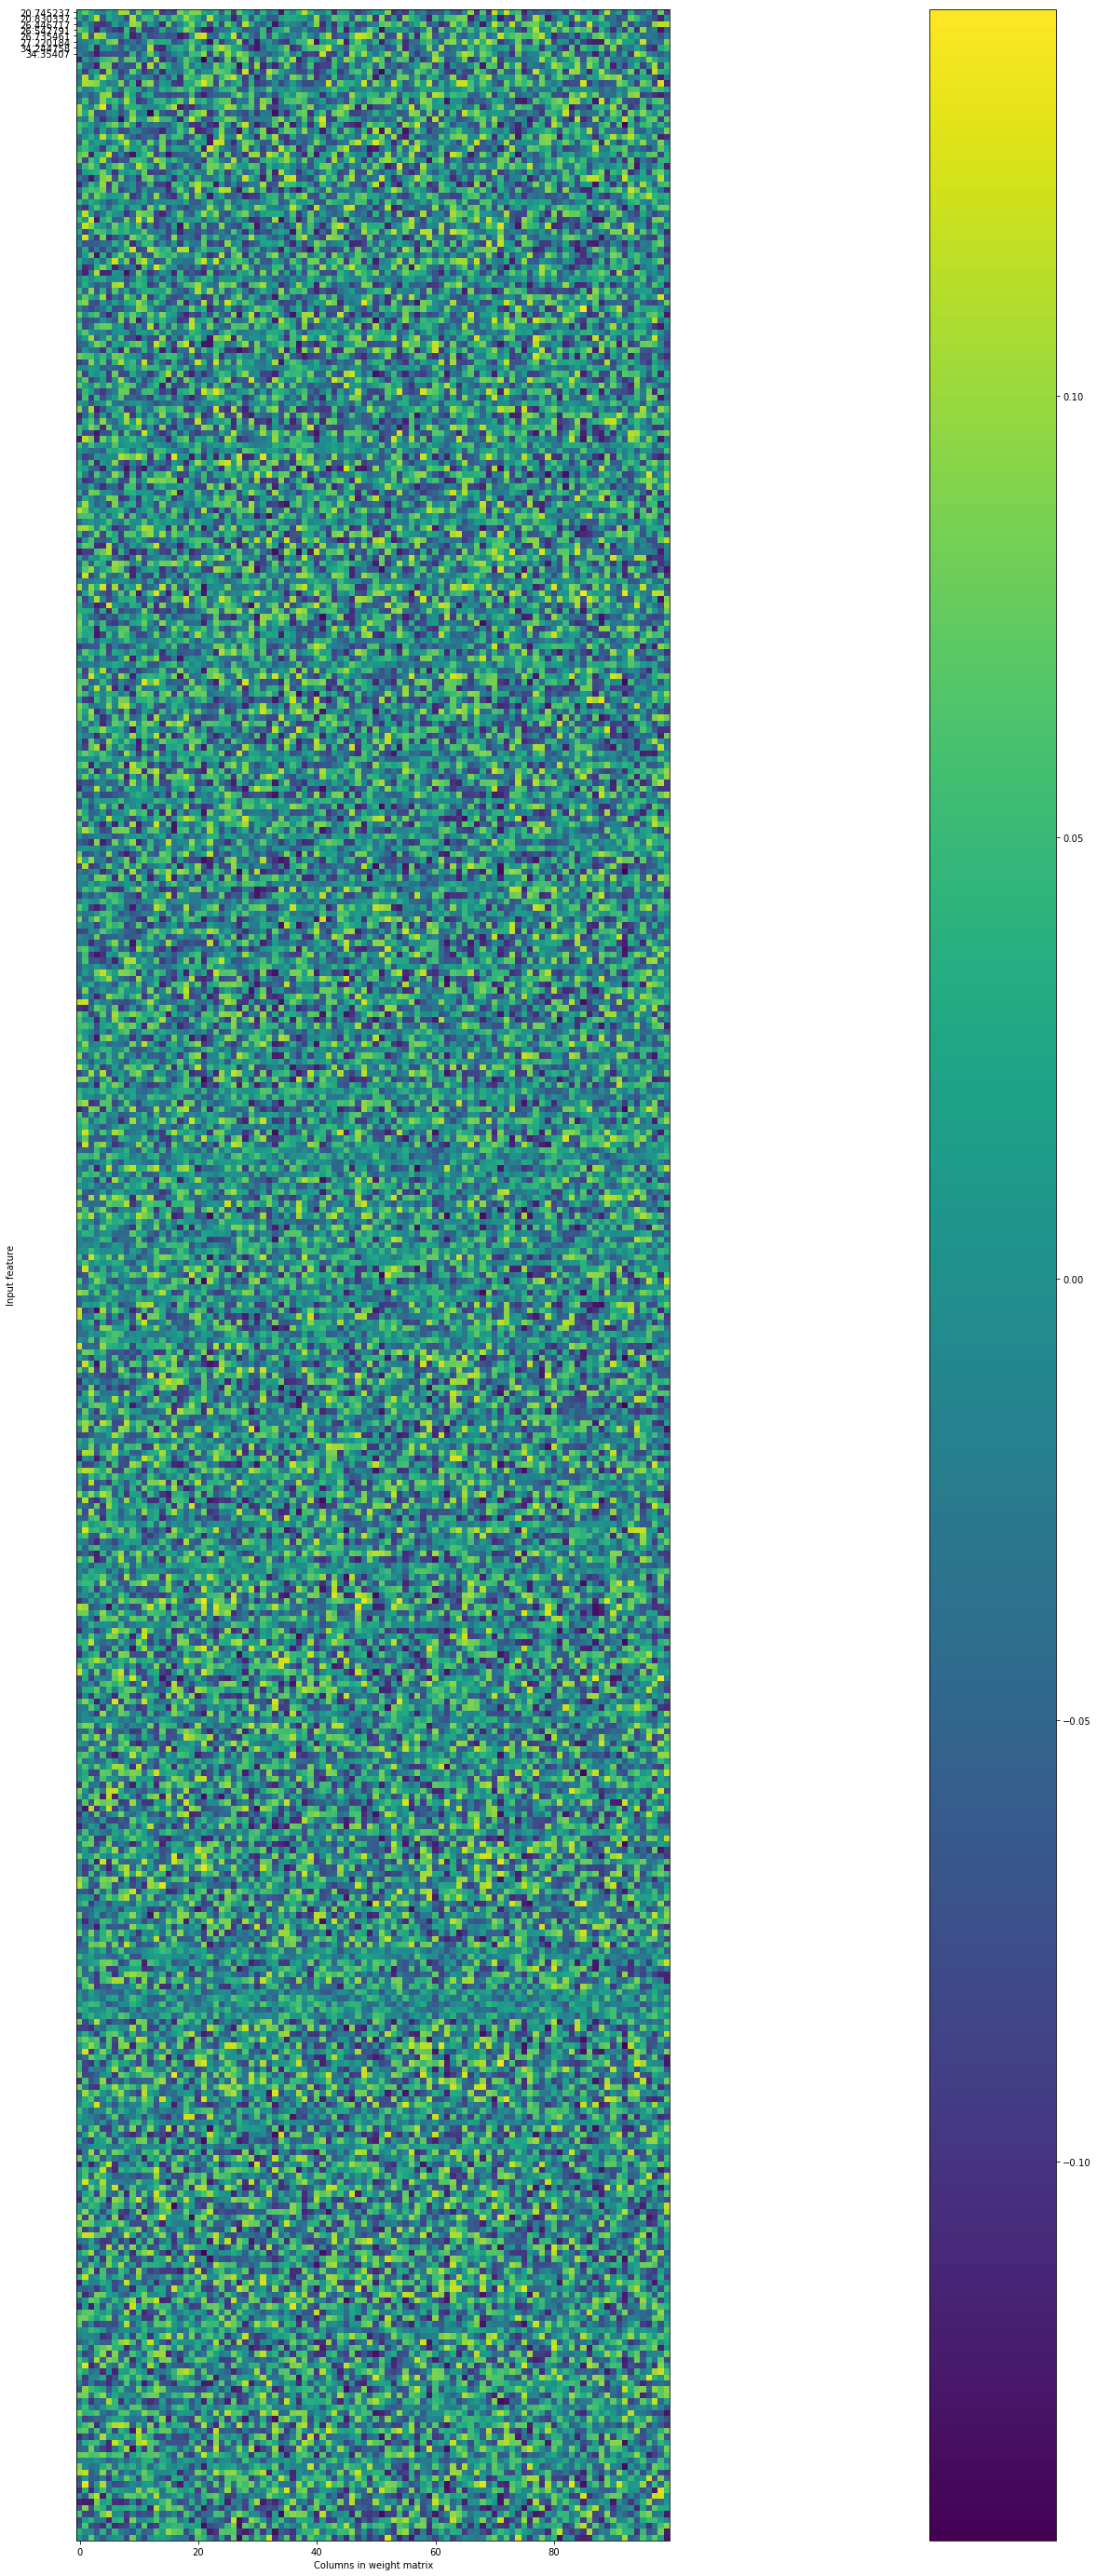

In [41]:
plt.figure(figsize=(100, 50))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), ovarian_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

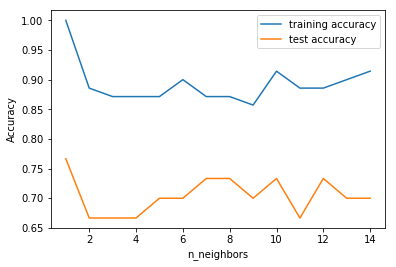

In [5]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [6]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.73
